# PROJECT MACHINE LEARNING #

# <a id="1"> Introduction</a>  


## Problématique

L'agriculture joue un rôle essentiel dans l'économie mondiale. La prévision du rendement des cultures est un problème agricole important. Ainsi, avec l'expansion continue de la population humaine, il est essentiel de mettre en place des outils intelligents de prévision des rendements des cultures pour aider les agriculteurs à prendre des décisions éclairées afin de relever les défis liés à la sécurité alimentaire et réduire les effets du changement climatique.

Le rendement agricole dépend principalement des conditions météorologiques (pluie, température, etc.), des pesticides utilisés, du type de sol et des informations précises sur l'historique du rendement des cultures, ce qui est important pour prendre des décisions liées à la gestion des risques agricoles et aux prévisions futures.



## Objectif

Il existe différents types d'algorithmes d'apprentissage automatique qui peuvent être utilisés pour la prévision du rendement des cultures, notamment la régression, les arbres de décision et les vecteurs à support de machine.

Dans ce travail, **nous allons utiliser certains de ces algorithmes de régression pour prédire les rendements des cultures à l'aide des differentes bibliothèques.** Ces algorithmes utilisent un ensemble de données d'entrée (telles que les données météorologiques, les données relatives au sol et les pratiques de gestion) pour prédire la sortie (rendement des cultures).




## Description du dataset

La base de données que nous allons utiliser est constituée des rendements des dix cultures les plus consommées dans le monde et provient originellement du site web de l'Organisation des Nations Unies pour l'alimentation et l'agriculture (FAO). Elle est également disponible et téléchargeable à partir de [Kaggle](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/code?datasetId=1760177).  

Ces données collectées comprennent le pays, la culture, l'année de 1961 à 2016 et la valeur des rendements de  chaque culture.   
Voici une description détaillée des différentes variables de la base de données:

| Variable                  | Description                                       |
| ------------------------- | ------------------------------------------------- |
| Area                      | Noms des pays qui cultivent des cultures          |
| Item                      | Types de cultures plantées                        |
| Year                      | Année de plantation des cultures, de 1961 à 2016  |
| average_rain_fall_mm_per_year | Précipitations moyennes par an (en mm)      |
| pesticides_tonnes         | Pesticides utilisés en tonnes                     |
| avg_temp                  | Température moyenne                               |
| hg/ha_yield               | Rendement des cultures en hectogramme par hectare (Hg/Ha) |



In [117]:
#normalization 
from csv import reader
def load_csv(filename):
  dataset = list()
  with open(filename, 'r') as file:
    csv_reader = reader(file)
    next(csv_reader)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset

def str_column_to_float(dataset, column):
  for row in dataset:
    row[column] = float(row[column].strip())
    
def dataset_minmax(dataset,columns):
  minmax = list()
  for column in columns:
      col_values = [row[column] for row in dataset]
      value_min = min(col_values)
      value_max = max(col_values)
      minmax.append([value_min, value_max])
  return minmax

def normalize_dataset(dataset, minmax,columns):
  for row in dataset:
    for i,column in enumerate(columns):
     row[column] = (row[column] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

filename = 'yield_df (1).csv'
dataset = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(dataset),len(dataset[0])))

columns_to_normalize=[3,4,5,6,7] #index des colonnes qu'on va normaliser

for column in columns_to_normalize: 
    str_column_to_float(dataset, column)
print(dataset[0])
minmax = dataset_minmax(dataset,columns_to_normalize)
normalize_dataset(dataset, minmax,columns_to_normalize)
print ("minmax:\n",minmax)




Loaded data file yield_df (1).csv with 28242 rows and 8 columns
['0', 'Albania', 'Maize', 1990.0, 36613.0, 1485.0, 121.0, 16.37]
minmax:
 [[1990.0, 2013.0], [50.0, 501412.0], [51.0, 3240.0], [0.04, 367778.0], [1.3, 30.65]]


#### ce script de normalisation permet de préparer les données pour des analyses ou des modélisations ultérieures en assurant que les colonnes spécifiées sont sur une échelle uniforme, facilitant ainsi l'interprétation et l'analyse des résultats. #####

In [119]:
#standarisation
from math import sqrt
def column_mean (dataset,columns):
    means =[0 for _ in columns]
    for i,column in enumerate(columns):
        cols_values=[row[column] for row in dataset]
        means[i] = sum(cols_values)/float(len(dataset))        
    return means
    
def column_stdevs (dataset,means,columns):
    stdevs =[0 for _ in columns]
    for i,column in enumerate(columns) :
        variance = [pow((row[column]- means[i]),2) for row in dataset]
        stdevs[i]= sum(variance)
    stdevs= [sqrt(x/float((len(dataset)-1))) for x in stdevs]
    return stdevs

def standarize_function (dataset,means,stdevs,columns):
    for row in dataset:
        for i,column in enumerate(columns):
            row[column] =(row[column]-means[i])/stdevs[i]


filename = 'yield_df (1).csv'
dataset = load_csv(filename)

columns_to_standardize=[3,4,5,6,7]

for column in columns_to_standardize: 
    str_column_to_float(dataset, column)

means=column_mean(dataset,columns_to_standardize)

stdevs=column_stdevs(dataset,means,columns_to_standardize)

print("moyenne de chaque colonne:\n",means)
print("l'ecart type de chaque colonne est:\n",stdevs)

st = standarize_function(dataset,means,stdevs,columns_to_standardize)
print(st)
print([round(stdevs[i],1) for i in range(len(stdevs))])
    


moyenne de chaque colonne:
 [2001.5442957297641, 77053.33209404434, 1149.055980454642, 37076.90934353091, 20.54262658451951]
l'ecart type de chaque colonne est:
 [7.05190528539453, 84956.61289666744, 709.8121499492202, 59958.784665058076, 6.312050836049793]
None
[7.1, 84956.6, 709.8, 59958.8, 6.3]


Moyennes des Colonnes : Les moyennes de chaque colonne sont calculées et affichées, donnant une idée des valeurs centrales.

Écarts Types des Colonnes : Les écarts types sont calculés, montrant la dispersion des valeurs dans chaque colonne.

Standardisation : Les données sont standardisées, permettant une meilleure préparation pour une analyse ou une modélisation ultérieure.

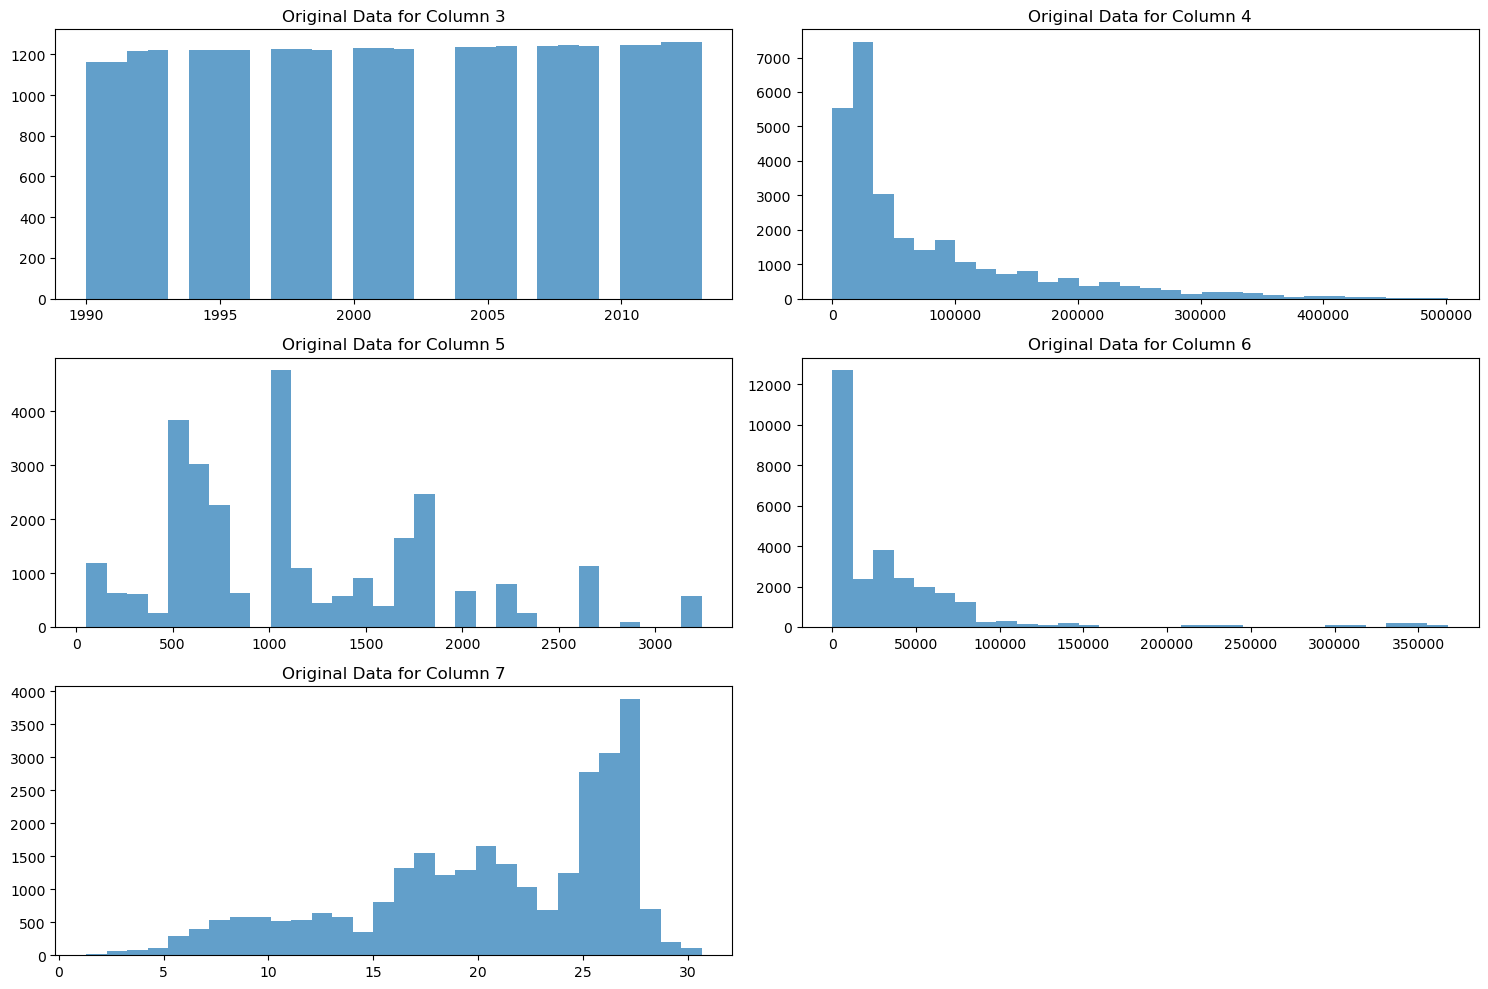

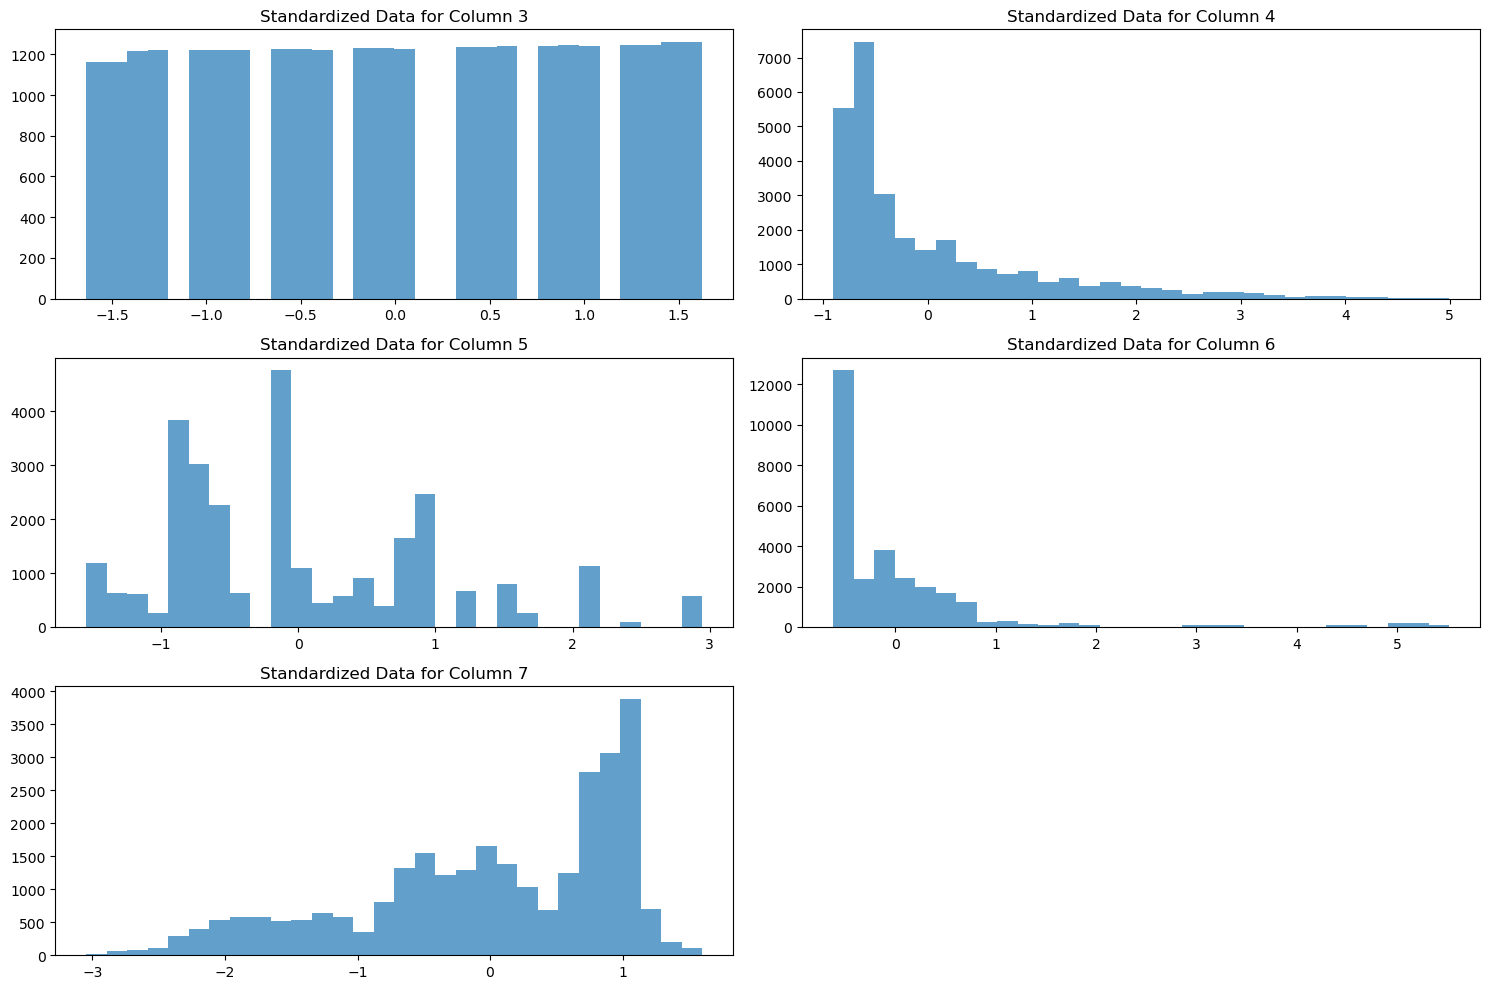

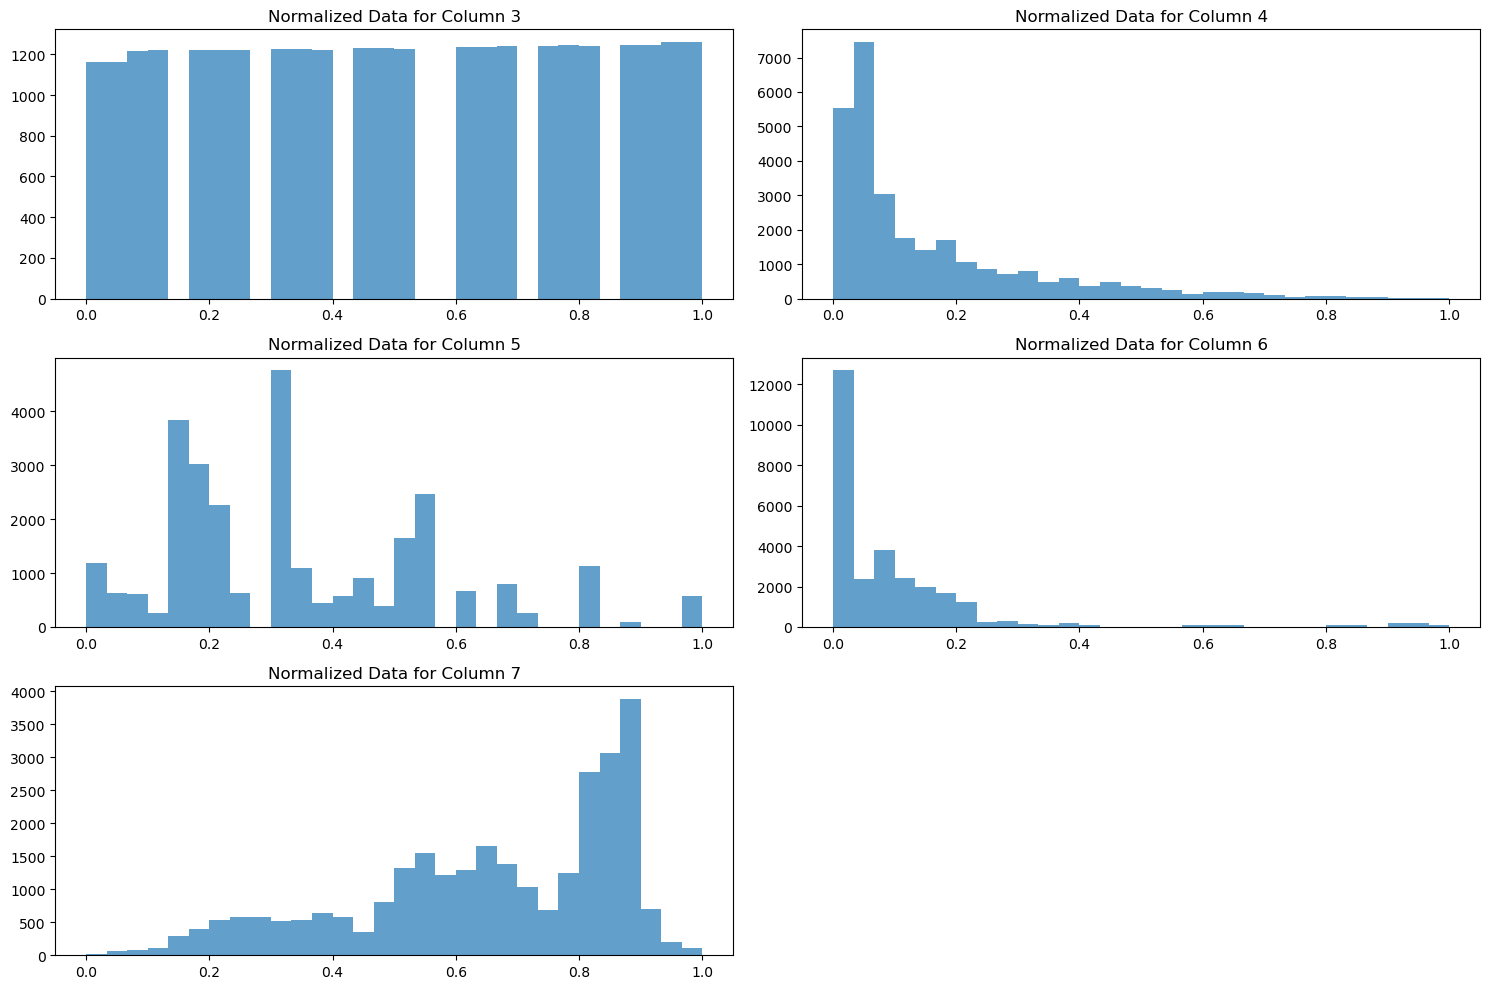

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Charger vos données
filename = 'yield_df (1).csv'
data = pd.read_csv(filename)

# Supposons que vous souhaitez normaliser les colonnes spécifiées
columns_to_normalize = [3, 4, 5, 6, 7]

# Sélectionner les colonnes spécifiques du DataFrame
selected_data = data.iloc[:, 3:8]

# Conversion en tableau NumPy
dataset = selected_data.values

# Visualiser les données d'origine
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_normalize):
    plt.subplot(3, 2, i + 1)
    plt.hist(dataset[:, i], bins=30, alpha=0.7)
    plt.title(f'Original Data for Column {column}')

plt.tight_layout()
plt.show()

# Standardisation des données
scaler = StandardScaler()
standardized_data = scaler.fit_transform(dataset)

# Normalisation des données
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(dataset)

# Visualiser les données standardisées
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_normalize):
    plt.subplot(3, 2, i + 1)
    plt.hist(standardized_data[:, i], bins=30, alpha=0.7)
    plt.title(f'Standardized Data for Column {column}')

plt.tight_layout()
plt.show()

# Visualiser les données normalisées
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_normalize):
    plt.subplot(3, 2, i + 1)
    plt.hist(normalized_data[:, i], bins=30, alpha=0.7)
    plt.title(f'Normalized Data for Column {column}')

plt.tight_layout()
plt.show()


Ici, on a la representation du data normalize et standardize des differentes colonnes

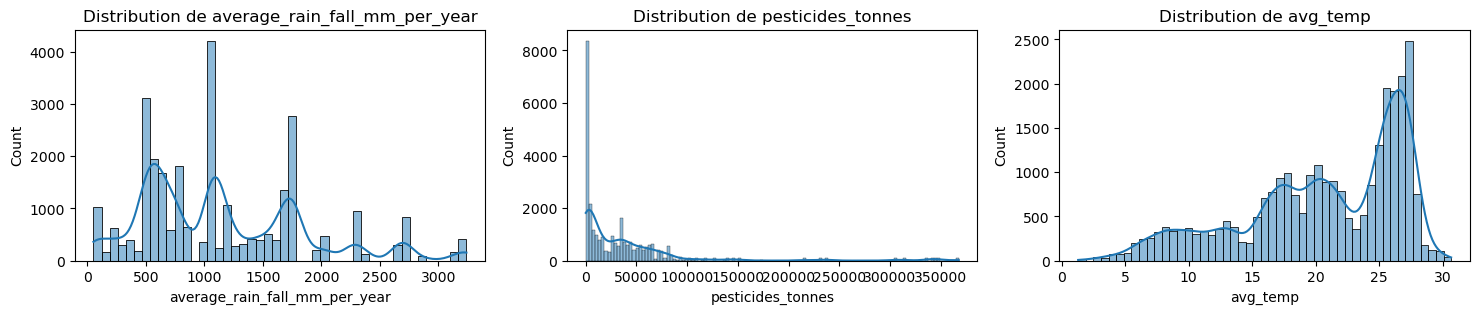

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))

g1=sns.histplot(data["average_rain_fall_mm_per_year"], kde=True, ax=axes[0]) 
g2=sns.histplot(data["pesticides_tonnes"], kde=True, ax=axes[1], label='Data') 
g3=sns.histplot(data["avg_temp"], kde=True, ax=axes[2], label='Data') 


g1.set_title("Distribution de average_rain_fall_mm_per_year")
g2.set_title("Distribution de pesticides_tonnes")
g3.set_title("Distribution de avg_temp")

plt.show()

C:\Users\samsung\AppData\Local\Temp\ipykernel_19104\803276584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(data["hg/ha_yield"], kde=True, label='Data')


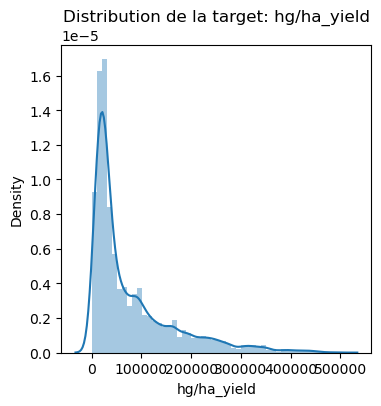

In [48]:
plt.figure(figsize=(4, 4))
g=sns.distplot(data["hg/ha_yield"], kde=True, label='Data') 
g.set_title("Distribution de la target: hg/ha_yield")

plt.show()

Les distributions fournissent des informations importantes sur les données avant la normalisation. Les pics et les formes des distributions peuvent indiquer des clusters naturels, des anomalies ou des comportements spécifiques dans les données.

Par exemple, la concentration des précipitations moyennes et des températures montre des tendances climatiques spécifiques, tandis que la distribution des pesticides peut indiquer des pratiques agricoles dominantes.

C:\Users\samsung\AppData\Local\Temp\ipykernel_19104\1646861807.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=90)


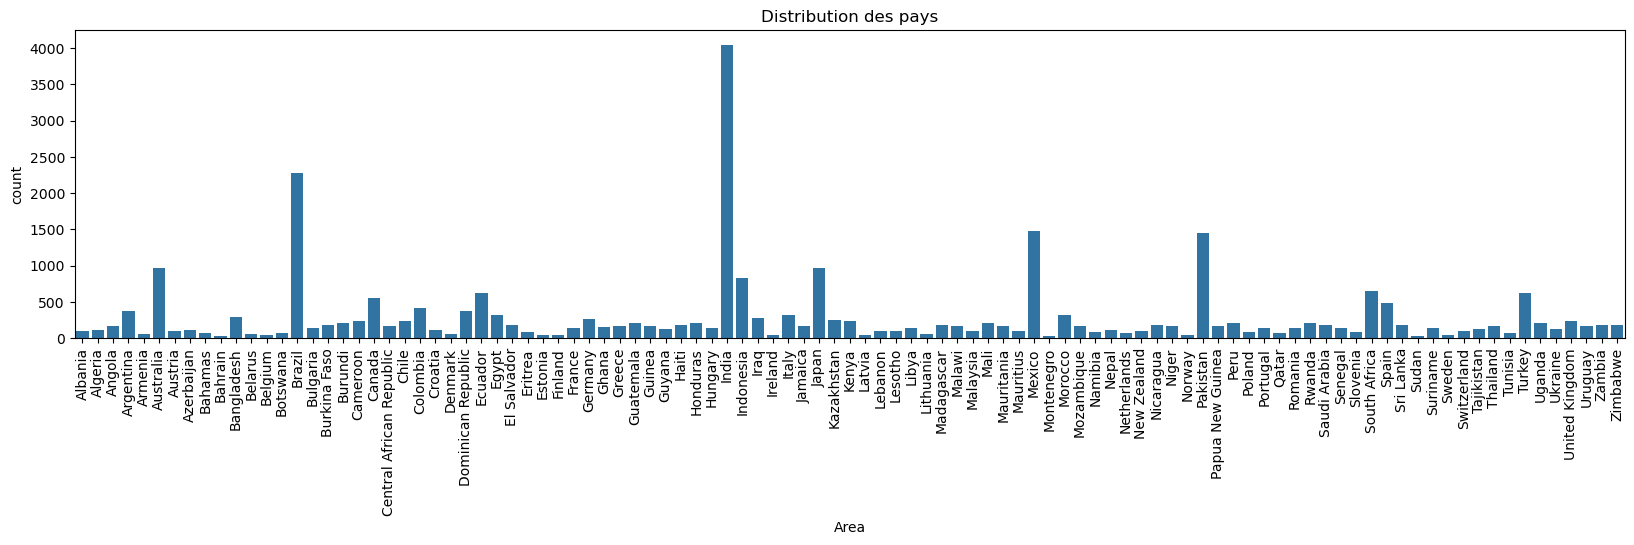

In [125]:
plt.figure(figsize=(20,4))
g2 = sns.countplot(data=data, x='Area')
g2.set_title("Distribution des pays")

g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.show()  

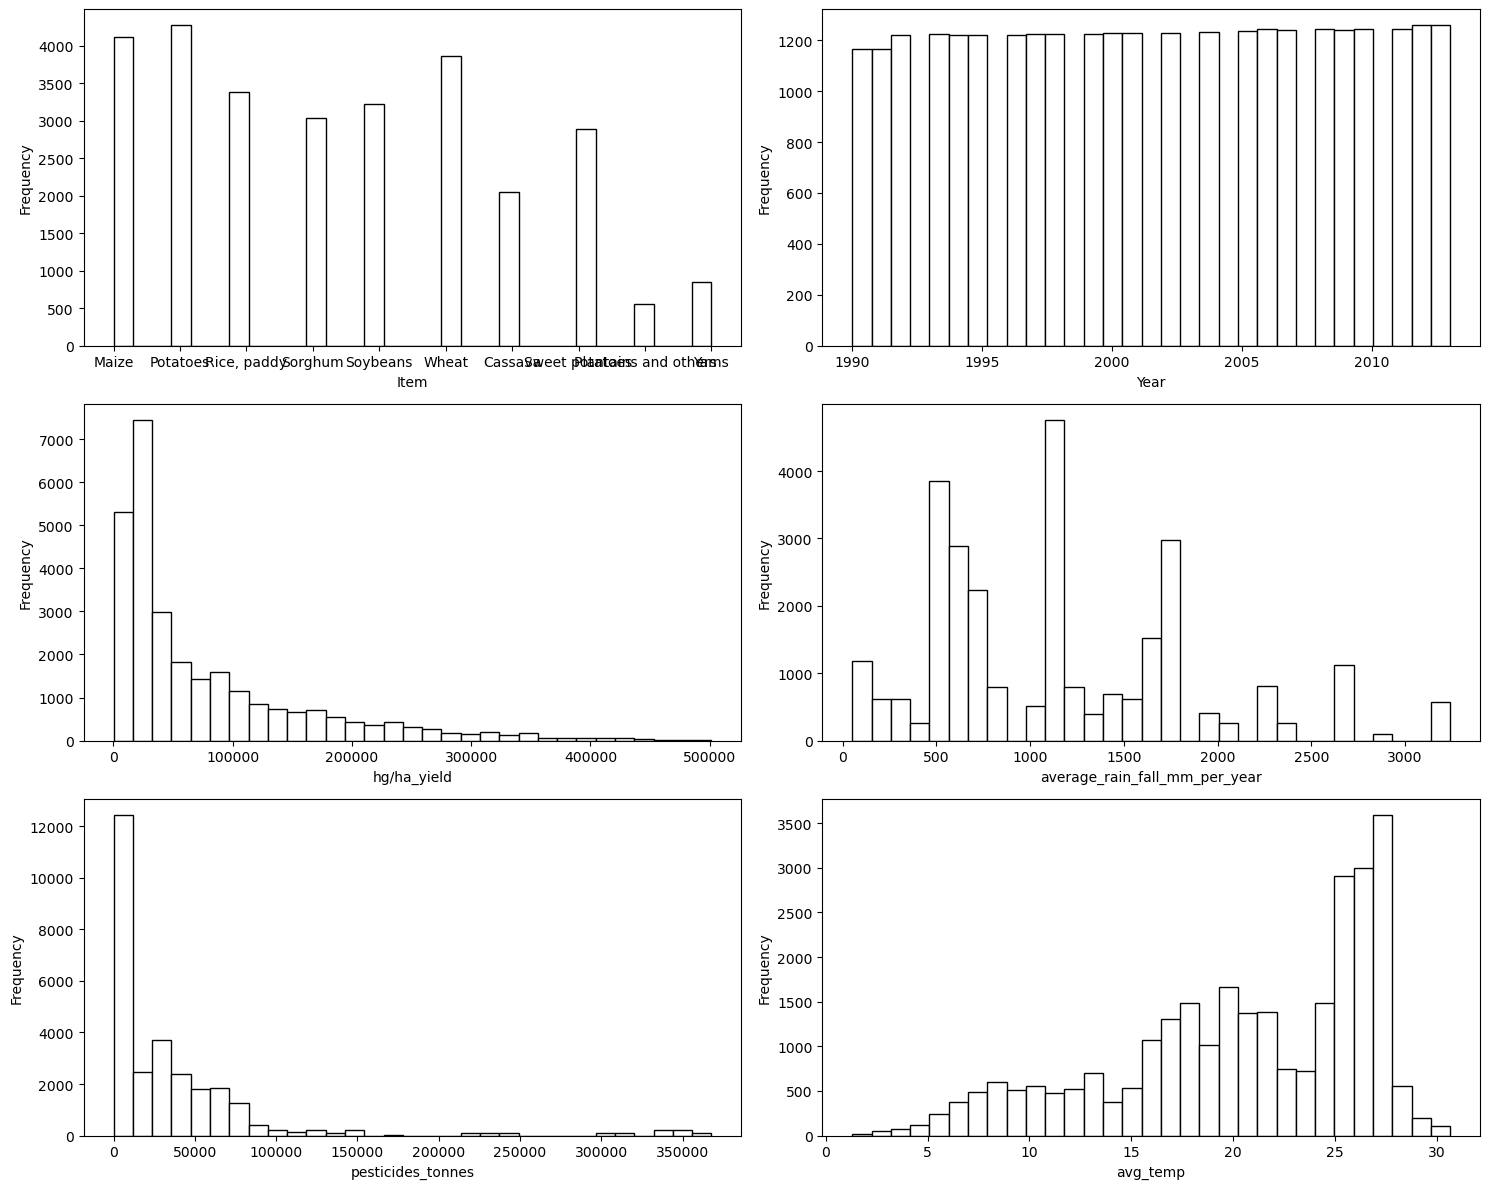

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
filename ='yield_df (1).csv'
data = read_csv(filename)
data = data.drop(columns=['Area', data.columns[0]])
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(data.columns): 
    ax = axes[i]
    ax.hist(data[col], bins=31, color='white', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

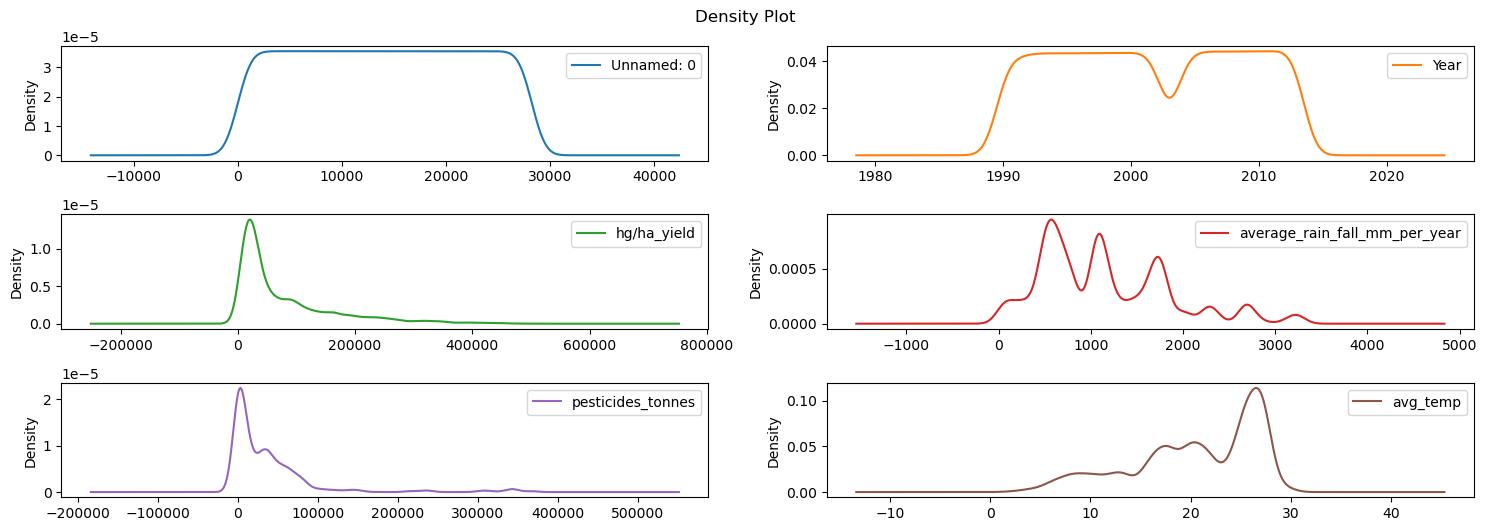

In [127]:
filename = 'yield_df (1).csv'
data = pd.read_csv(filename)
data.plot(kind='density', subplots=True, layout=(7, 2),
          sharex=False, sharey=False,
          figsize=(15, 12),
          alpha=1,
          title='Density Plot')
plt.tight_layout()
plt.show()

Des trois graphes faites en haut, j'ai juste voulu montrer que les graphes de densite ne permettent pas de representer des colonnes string

Aussi, ces graphes permettent de voir de facon generale le data en question

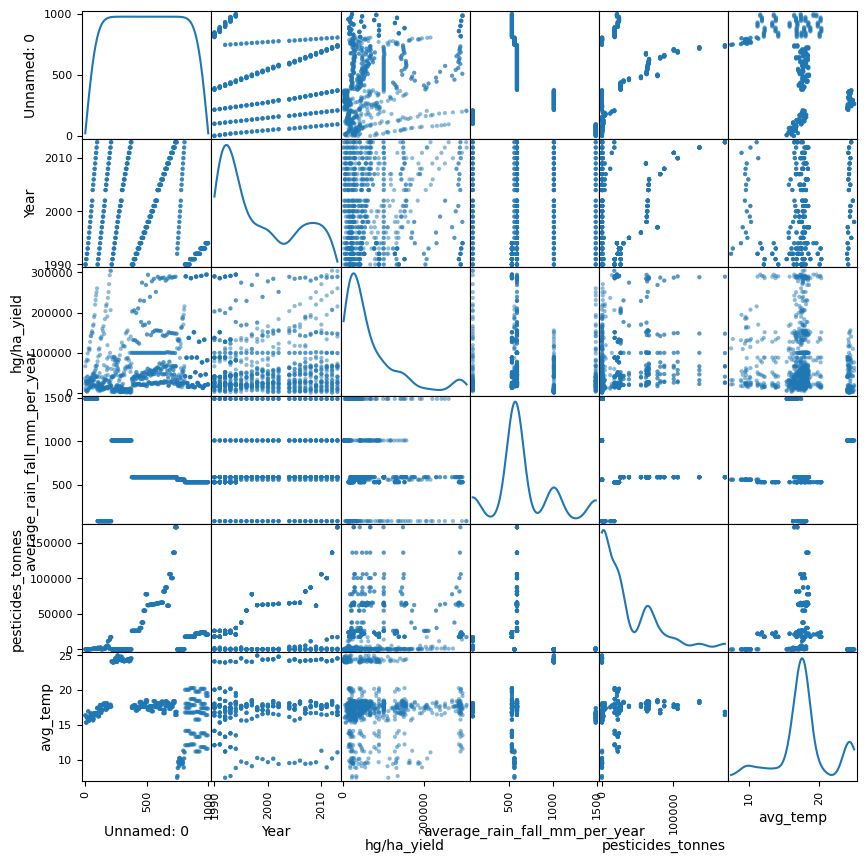

In [129]:
# Scatterplot Matrix
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix

# Load dataset
filename = 'yield_df (1).csv'
data = read_csv(filename)
data = data.drop(data.columns[[ 1, 2]], axis=1)

# Plot scatter matrix
scatter_matrix(data.head(1000), figsize=(10, 10), diagonal='kde')  #on va representer la correlation des 1000 premieres lignes

# Show plot
plt.show()


comme vu l'indexage,ici c'est la colonne sans nom n'a pas de lien avec la correlation 

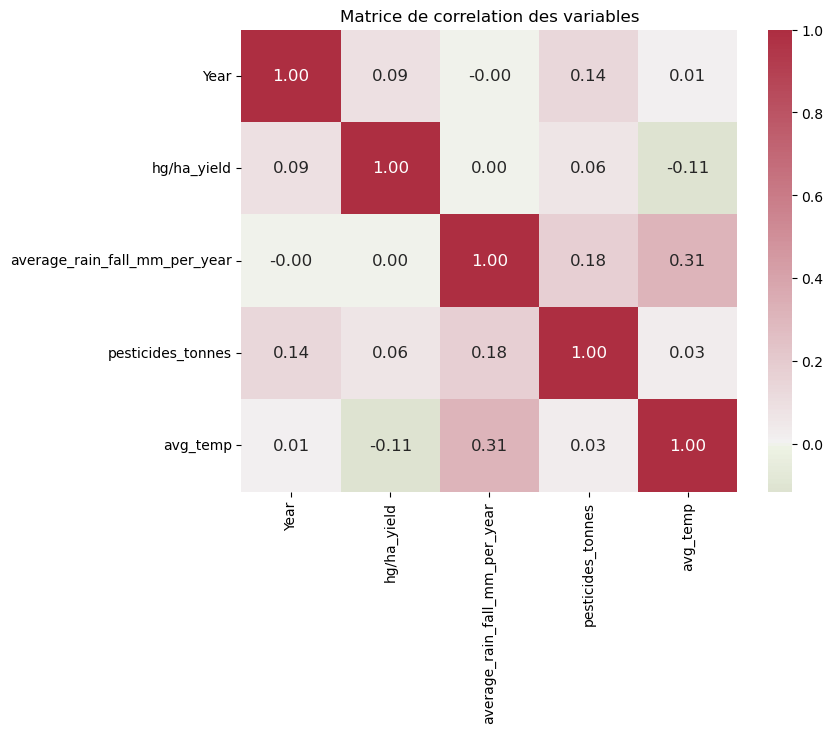

In [131]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import read_csv
filename ='yield_df (1).csv'
data = read_csv(filename)
pd.set_option('display.precision', 2)
data = data.drop(data.columns[[0, 1, 2]], axis=1)     #suppression des colonnes 0,Area,item dans le data
matrice_corr = data.corr()
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_corr, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}).set_title('Matrice de correlation des variables');



##### le target (hg/ha_yield ) et les Autres Variables :

average_rain_fall_mm_per_year : La corrélation est quasi nulle (0,00), indiquant qu'il n'y a pas de relation significative entre les rendements agricoles et les précipitations moyennes.

pesticides_tonnes : La corrélation est faible et positive (0,06), suggérant une légère relation entre l'utilisation de pesticides et les rendements.

avg_temp : La corrélation est faible et négative (-0,11), ce qui indique qu'une légère augmentation de la température moyenne pourrait être associée à une diminution des rendements agricoles.

##### conclusion

Rendements Agricoles : Les rendements agricoles (hg/ha_yield) ne montrent pas de corrélation significative avec les précipitations ou l'utilisation de pesticides, mais une légère relation négative avec la température moyenne, indiquant que des températures plus élevées pourraient légèrement réduire les rendements.

# <a id="4"> DATA PREPROCESSING </a>

In [135]:
import pandas as pd
data=pd.read_csv('yield_df (1).csv')
data.shape


(28242, 8)

le data compte 28242 rows and 8 colunms y compris la colonne de l'indexage

In [137]:
data = pd.read_csv("yield_df (1).csv",index_col=0) # ici on va lire sans la colonne de l'indexage
data.shape

(28242, 7)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [141]:
data.isna().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

<Axes: >

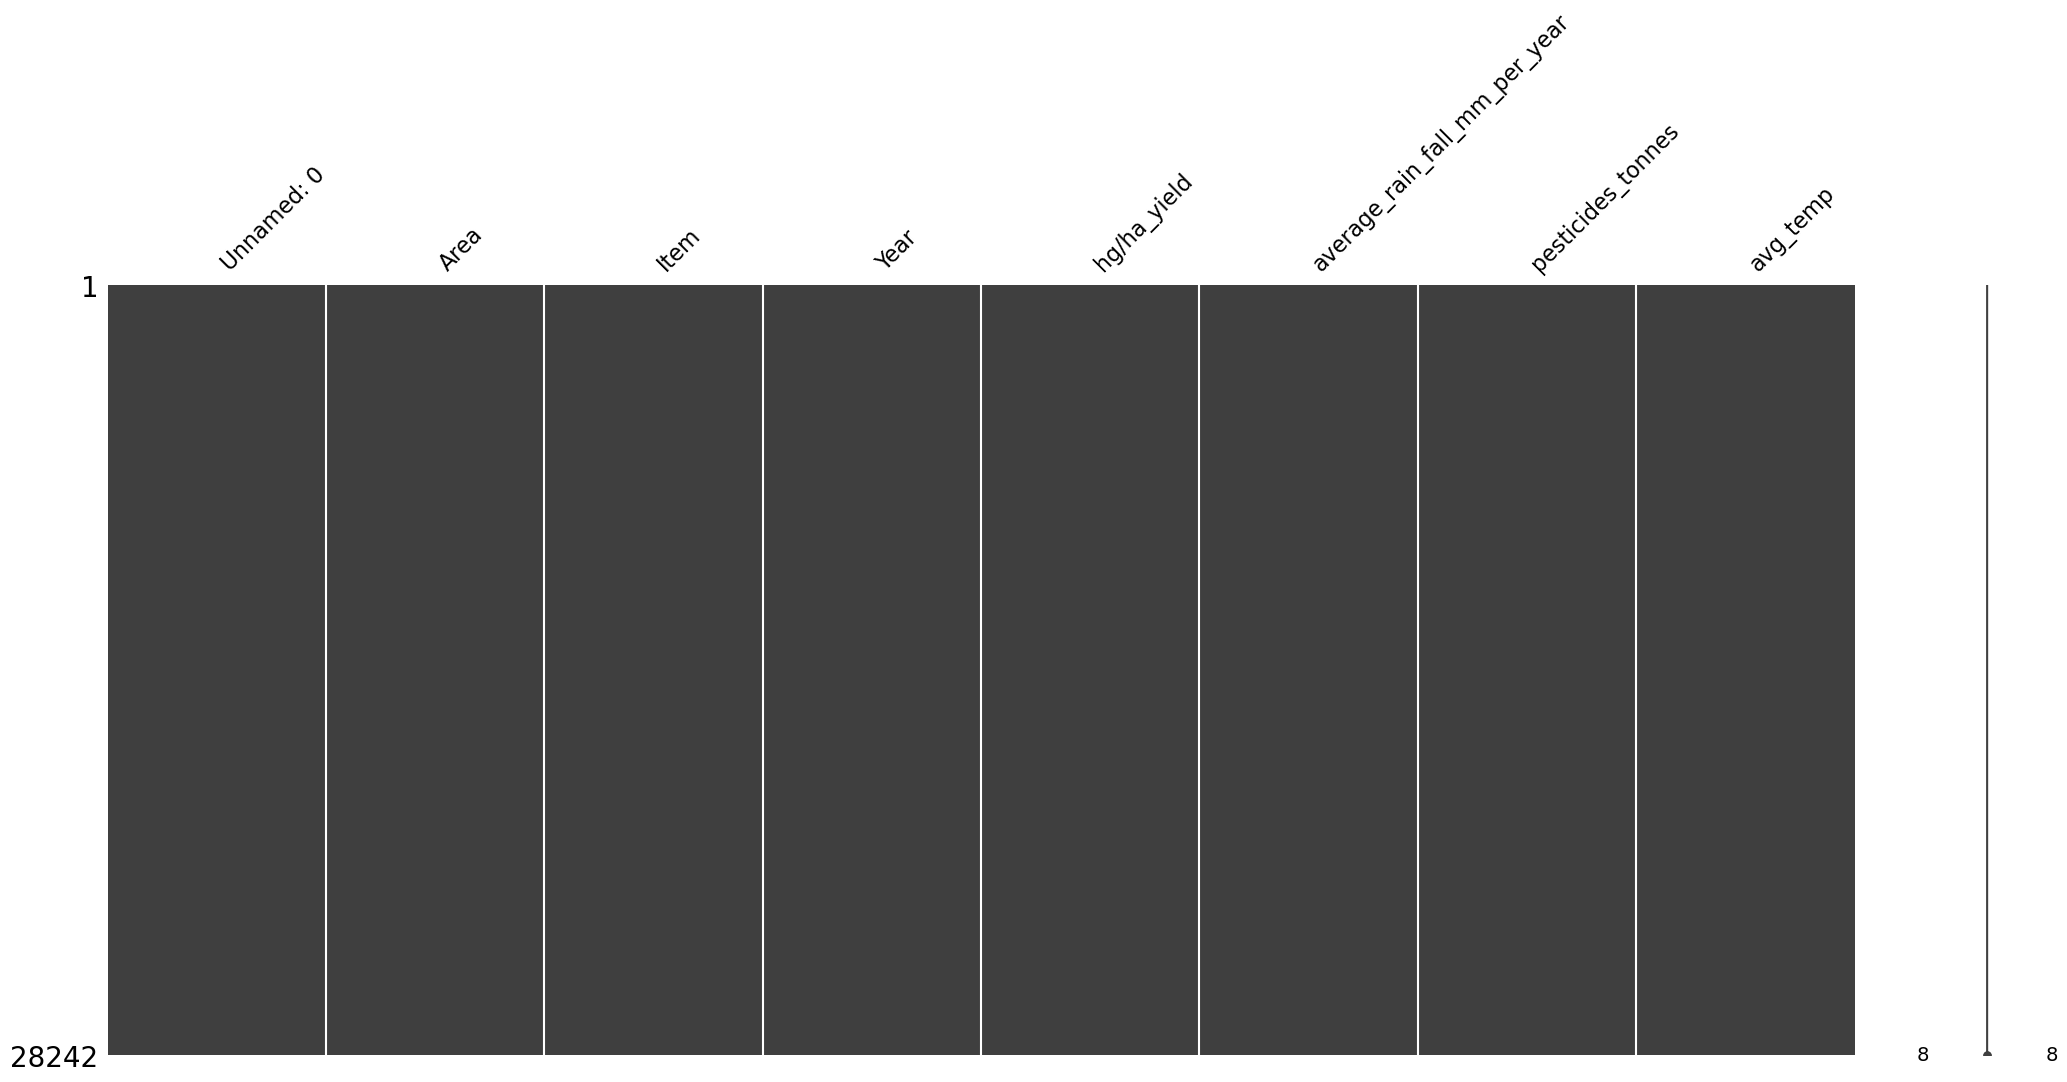

In [143]:
import pandas as pd
import missingno as msno

# Charger les données Superstore
filename = 'yield_df (1).csv'
data = pd.read_csv(filename)

# Visualiser les données manquantes
msno.matrix(data)                  





##### comme  on peut le constater il n'y a pas de missing data

In [145]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.50,8152.91,0.00,7060.25,14120.50,21180.75,28241.00
Year,28242.0,2001.54,7.05,1990.00,1995.00,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.33,84956.61,50.00,19919.25,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.06,709.81,51.00,593.00,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.91,59958.78,0.04,1702.00,17529.44,48687.88,367778.00
avg_temp,28242.0,20.54,6.31,1.30,16.70,21.51,26.00,30.65


# <a id="4">  EXPLORATORY DATA ANALYSIS </a>

C:\Users\samsung\AppData\Local\Temp\ipykernel_19104\3249495121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Item', palette='deep')


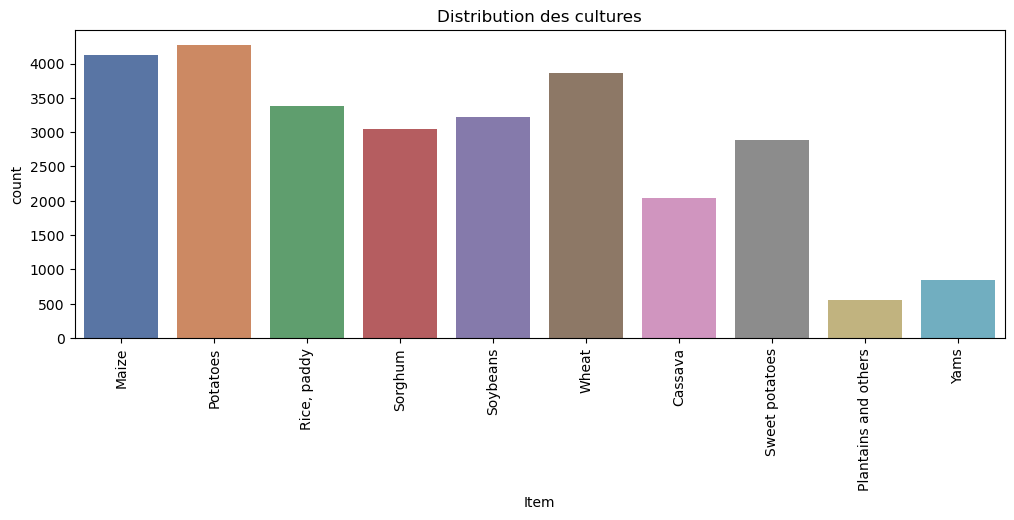

In [147]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 4))
sns.countplot(data=data, x='Item', palette='deep')
plt.title('Distribution des cultures')
plt.xticks(rotation = 90)
plt.show()
  


### Il y a exactement dix (10) types de cultures les plus consommer dans le monde (Item) que sont: Le manioc,Le maïs,Plantains et autres,Pommes de terre, Riz, paddy, Sorgho,Soja, Patates douces,Blé,Igname. ########

In [149]:
# voir les pays avec les plus hauts rendements
data.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

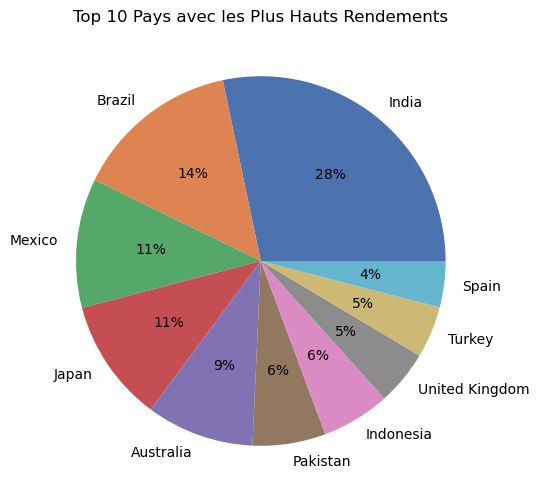

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
filename = 'yield_df (1).csv'
data = pd.read_csv(filename)

# Calculer les 10 pays avec les plus hauts rendements
top_yielding_countries = data.groupby(['Area'], sort=True)['hg/ha_yield'].sum().nlargest(10).reset_index()

# Préparer les données pour le diagramme circulaire
data = top_yielding_countries['hg/ha_yield']
labels = top_yielding_countries['Area']

# Définir la palette de couleurs à utiliser
colors = sns.color_palette('deep')

# Créer le diagramme circulaire
plt.figure(figsize=(10, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Top 10 Pays avec les Plus Hauts Rendements')
plt.show()


Investissements Ciblés :

Les pays en bas du classement pourraient tirer parti de l'analyse des pratiques des pays en tête pour améliorer leur production agricole. Des investissements ciblés dans les technologies agricoles, les pratiques durables et la recherche pourraient aider à augmenter les rendements.

Partage des Connaissances :

Les pays avec des rendements élevés pourraient partager leurs connaissances et technologies avec les pays à rendements plus faibles par le biais de programmes de coopération internationale et d'initiatives de développement agricole.

Gestion des Ressources :

Les pays à rendements élevés doivent également gérer de manière durable leurs ressources agricoles pour maintenir leurs niveaux de production tout en préservant l'environnement.

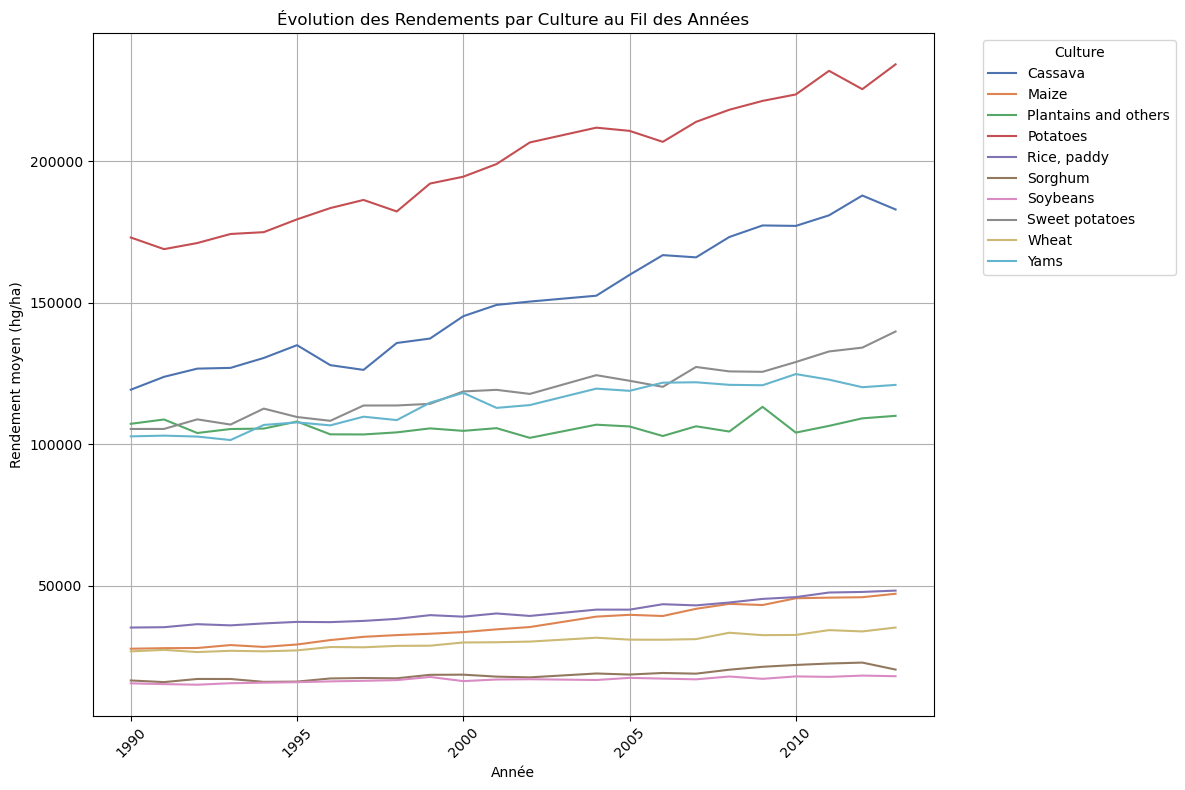

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
filename = 'yield_df (1).csv'
data = pd.read_csv(filename)

# Calculer les rendements moyens par année et culture
mean_yield_per_year_item = data.groupby(['Year', 'Item'])['hg/ha_yield'].mean().reset_index()

# Configurer la figure et les axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Tracer les lignes pour chaque culture
sns.lineplot(x='Year', y='hg/ha_yield', hue='Item', data=mean_yield_per_year_item, palette='deep')

# Personnaliser le graphique
plt.xlabel('Année')
plt.ylabel('Rendement moyen (hg/ha)')
plt.title('Évolution des Rendements par Culture au Fil des Années')
plt.legend(title='Culture', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tendances Générales de Croissance :

Certaines cultures, comme le maïs, le riz et le blé, montrent une tendance générale à la hausse des rendements au fil des décennies. Cela peut être attribué aux avancées technologiques, à l'amélioration des pratiques agricoles, et à une meilleure gestion des ressources.

Périodes de Stagnation ou de Déclin :

Certaines cultures, comme les patates douces et les sorghos, montrent des périodes de stagnation ou de déclin dans les rendements. Ces fluctuations peuvent être dues à des facteurs climatiques, économiques, ou à des changements dans les pratiques agricoles.

Variabilité des Rendements :

La variabilité des rendements est observable pour certaines cultures. Par exemple, le rendement du manioc montre des pics et des creux significatifs au fil des années, indiquant une sensibilité élevée aux conditions environnementales et aux pratiques agricoles.

## Division du dataset (train-test)

Le jeu de données original sera divisé en jeux de données d'entraînement et de test. Les pourcentages typiques pour l'entraînement/test sont 70/30 ou 80/20.

- **Le jeu de données d'entraînement (70 %)** est utilisé pour apprendre à l'algorithme d'apprentissage automatique à faire des prédictions précises.
- **Le jeu de données de test (30 %)** est utilisé pour évaluer la performance de l'algorithme après l'apprentissage.


### 1: Entrainement du modèle de régression linéaire simple

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

data_enc = pd.get_dummies(data, columns=["Area","Item"], prefix = ['Country',"Item"])  

X = data_enc.loc[:, data_enc.columns != 'hg/ha_yield']  
y = data['hg/ha_yield'] 
X = X.drop(['Year'], axis=1)   

scaler = MinMaxScaler()  
X = scaler.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)  

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_preds = linear_reg.predict(X_test)

score = linear_reg.score(X_test, y_preds)
erreur_mae = mean_absolute_error(y_test, y_preds) 
score_r2 = r2_score(y_test, y_preds)

print(f"Erreur Absolue Moyenne - MAE: {erreur_mae}")
print(f"Coéfficient R2: {score_r2}")

Erreur Absolue Moyenne - MAE: 30132.829812345095
Coéfficient R2: 0.7441007053331694


In [200]:
scores.append(('Linear Regression', score, erreur_mae, score_r2))

### 2: Entrainement du modèle d'arbre de decision

In [196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
arbre_decision = DecisionTreeRegressor()
arbre_decision.fit(X_train, y_train)

y_preds = arbre_decision.predict(X_test)

score = linear_reg.score(X_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
score_r2 = r2_score(y_test, y_preds)

print(f"Model mean_squared_error with Selected Features (MSE): {mse:.1f}")
print(f"Erreur Absolue Moyenne - MAE: {erreur_mae}")
print(f"Coéfficient R2: {score_r2}")


Model mean_squared_error with Selected Features (MSE): 163834183.6
Erreur Absolue Moyenne - MAE: 32889.83458048973
Coéfficient R2: 0.9780535579372734


In [202]:
scores.append(('Arbre de decision', score, erreur_mae , score_r2))

### 3: Entrainement du modèle de foret aléatoires

In [194]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt

random_f = RandomForestRegressor(n_estimators=200, max_depth=3)
random_f.fit(X_train, y_train)

y_preds = random_f.predict(X_test)

score = linear_reg.score(X_test, y_preds)
erreur_mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mse)
score_r2 = r2_score(y_test, y_preds)

print(f"rmse : {rmse}")
print(f"Erreur Absolue Moyenne - MAE: {erreur_mae}")
print(f"Coéfficient R2: {score_r2}")

rmse : 12393.956743312623
Erreur Absolue Moyenne - MAE: 32889.83458048973
Coéfficient R2: 0.6809092369865544


In [204]:
scores.append(('Random Forest', score, erreur_mae , score_r2))

## <a id="53">Performances des modèles</a>

**Le score de régression R2 (coefficient de détermination)**, qui indiquera le pourcentage de variance pour les éléments (cultures) dans le modèle de régression, fournit la base de la mesure d'évaluation. À quel point les données (points de données) correspondent à une courbe ou une ligne est montré par le score R2.

R2 est un indice statistique qui varie de 0 à 1, mesurant à quel point une ligne de régression ressemble aux données auxquelles elle est ajustée. 
- **S'il est égal à 1**, le modèle prédit avec précision 100 % de la variation des données ; 
- **s'il est égal à 0**, le modèle prédit avec précision 0 % de la variance.

**Selon les résultats présentés ci-dessus, le régresseur de l'arbre de décision est plus performant que les 2 autres.**  
C'est donc lui qu'on va garder comme notre meilleur modèle.

# <a id="1"> Conclusion</a>  

En conclusion, la prédiction du rendement des cultures à l'aide de l'apprentissage automatique a le potentiel de révolutionner l'industrie agricole. En fournissant des prévisions plus précises, en améliorant la prise de décision, en augmentant l'efficacité et en renforçant la durabilité, cette technologie peut aider les agriculteurs à obtenir de meilleurs rendements et des entreprises plus rentables. Bien que l'utilisation de l'apprentissage automatique pour la prédiction du rendement des cultures pose certains problèmes, les avantages sont évidents et nous pouvons nous attendre à des progrès continus dans ce domaine dans les années à venir.